In [3]:
# Import necessary library
import pandas as pd

# load the data from the CSV file
df = pd.read_csv("cleaned_main_df.csv")

In [4]:
# Importing necessary libraries
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example text for sentiment analysis
sample_text = "This is a great product with excellent features!"

# Analyze the sentiment of the text
sentiment_score = sia.polarity_scores(sample_text)

# Display the sentiment score
print(sentiment_score)


{'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.8439}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
def analyze_sentiment(text):

    if isinstance(text, str) and text:
        return sia.polarity_scores(text)
    else:

        return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}


df['Sentiment'] = df['Description'].apply(lambda x: analyze_sentiment(x))


In [6]:
# Importing necessary libraries for VADER sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


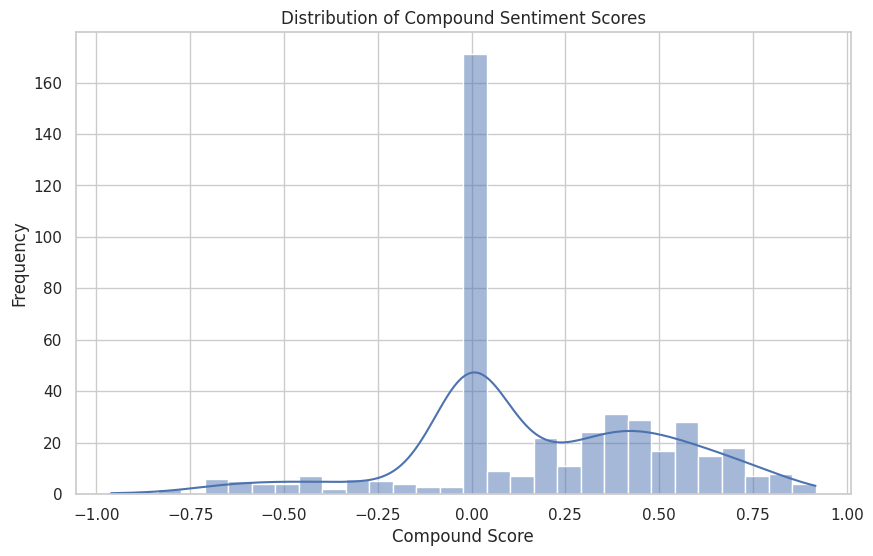

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Function to analyze sentiment
def analyze_sentiment(text):
    if isinstance(text, str) and text:
        return sia.polarity_scores(text)
    else:
        return {'neg': 0, 'neu': 1, 'pos': 0, 'compound': 0}

# Apply the function to the 'Description' column
df['Sentiment'] = df['Description'].apply(lambda x: analyze_sentiment(x))

# Extracting individual sentiment scores
df['Negative'] = df['Sentiment'].apply(lambda x: x['neg'])
df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Compound'] = df['Sentiment'].apply(lambda x: x['compound'])

# Save the updated DataFrame to a new CSV file
updated_csv_path = 'updated_csv_file'
df.to_csv(updated_csv_path, index=False)

# Plotting the distribution of Compound scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['Compound'], kde=True, bins=30)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


For Grouping by Company

In [8]:
def mock_analyze_sentiment(text):

    return {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

# Grouping the dataset by 'Company' and applying sentiment analysis to each group
grouped_sentiments = df.groupby('Company')['Description'].apply(lambda x: x.apply(mock_analyze_sentiment))

grouped_sentiments.head()

<ipython-input-8-e4e1e04a1220>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_sentiments = df.groupby('Company')['Description'].apply(lambda x: x.apply(mock_analyze_sentiment))


0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Description, dtype: object

In [9]:
# Function to analyze sentiment
def analyze_sentiment(text):
    if isinstance(text, str):
        return sia.polarity_scores(text)['compound']  # Using the compound score
    else:
        return 0  # Return a neutral score for non-string or null values

# Apply the function to the 'Description' column
df['Compound'] = df['Description'].apply(analyze_sentiment)

# Group by 'Company' and calculate the average sentiment
average_sentiments = df.groupby('Company')['Compound'].mean()

# Display the average sentiment scores for each company
print(average_sentiments)


Company
Abel  Cole                              0.280292
Adam Smith International                0.041317
All Market Europe Ltd                   0.360408
Bates Wells                             0.054342
Bennetts Associates                     0.336257
Bighams                                 0.128000
Blue Zoo Productions Ltd                0.564800
BrewDog                                 0.165100
Bridges Fund Management                 0.314892
Bruichladdich Distillery Co. Ltd        0.068000
Cook Trading Ltd                        0.094642
Coutts  Company                        -0.009472
Divine Chocolate Ltd                    0.261850
EQ Investors Group Limited              0.338858
Edit Agency Limited                     0.167575
Emma Bridgewater Ltd                    0.134680
Farmdrop Ltd                            0.000000
Freud Communications Limited           -0.060882
Generation Investment Management LLP    0.131353
Genuine Solutions                       0.368142
Ground Contr

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Example function to categorize sentiment
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Description'] = df['Description'].astype(str)

sia = SentimentIntensityAnalyzer()
df['compound'] = df['Description'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['compound'].apply(categorize_sentiment)


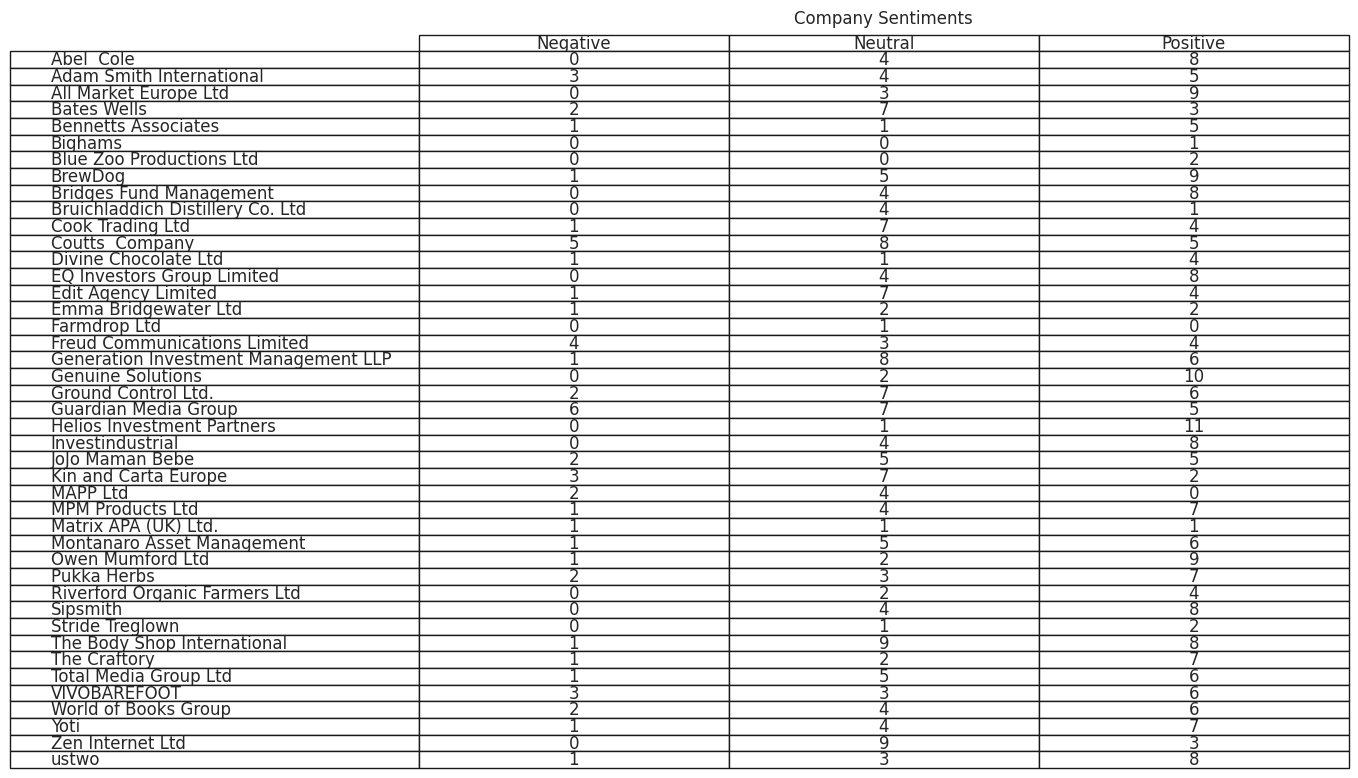

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

summary = df.groupby(['Company', 'sentiment']).size().unstack(fill_value=0)

# Plotting the table
plt.figure(figsize=(12, 6))
plt.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, cellLoc = 'center', loc='center')
plt.axis('off')
plt.title('Company Sentiments', y=1.3)
plt.show()


In [14]:
summary.to_csv('summary.csv')